In [25]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics

In [41]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sklearn.datasets

# 50,100,150 images are with stickers # 19,20 images are test images
imug1 = mpimg.imread('50.png')
imug2 = mpimg.imread('20.png')
imug3 = mpimg.imread('100.png')
imug4 = mpimg.imread('19.png')

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
linear_regressor = LinearRegression()
imug1.shape
imug2.shape
imug3.shape
imug4.shape

(32, 32, 3)

In [44]:
imug1_new=imug1.transpose(2,0,1).reshape(3,-1)
imug2_new=imug2.transpose(2,0,1).reshape(3,-1)
imug3_new=imug3.transpose(2,0,1).reshape(3,-1)
imug4_new=imug4.transpose(2,0,1).reshape(3,-1)

In [45]:
print(imug1_new.shape)
print(imug2_new.shape)
print(imug3_new.shape)
print(imug4_new.shape)

(3, 1024)
(3, 1024)
(3, 1024)
(3, 1024)


In [46]:
train1=pd.DataFrame(imug1_new)
train2=pd.DataFrame(imug3_new)
test1=pd.DataFrame(imug2_new)
test2 = pd.DataFrame(imug4_new)

In [47]:
tf1 = train1.transpose()
tf1.head()

,0,1,2
0,0.600000,0.603922,0.556863
1,0.654902,0.588235,0.490196
2,0.815686,0.756863,0.654902
3,0.674510,0.658824,0.596078
4,0.768627,0.741176,0.666667


In [48]:
tf2 = train2.transpose()
tf2.head()

,0,1,2
0,0.600000,0.603922,0.556863
1,0.654902,0.588235,0.490196
2,0.815686,0.756863,0.654902
3,0.674510,0.658824,0.596078
4,0.768627,0.741176,0.666667


In [49]:
tt1 = test1.transpose()
tt1.head()

,0,1,2
0,0.486275,0.556863,0.462745
1,0.490196,0.556863,0.462745
2,0.482353,0.552941,0.466667
3,0.478431,0.549020,0.462745
4,0.490196,0.552941,0.466667


In [50]:
tt2 = test2.transpose()
tt2.head()

,0,1,2
0,0.494118,0.568627,0.545098
1,0.454902,0.533333,0.521569
2,0.466667,0.541176,0.533333
3,0.447059,0.521569,0.505882
4,0.372549,0.454902,0.435294


In [51]:
tf = tf1.append(tf2, ignore_index=True)

In [52]:
tt = tt1.append(tt2, ignore_index = True)

In [53]:
tt.shape

(2048, 3)

In [54]:
tf.shape

(2048, 3)

In [55]:
X_numpy = tf.values
Y_numpy = tt.values

In [57]:
model = linear_regressor.fit(X_numpy, Y_numpy)
Y_pred = linear_regressor.predict(X_numpy)

In [58]:
Y_pred

array([[0.5661418 , 0.57770216, 0.5535038 ],
       [0.51758116, 0.5318215 , 0.49440485],
       [0.57550824, 0.6020698 , 0.57207054],
       ...,
       [0.3589174 , 0.42879337, 0.35379893],
       [0.3494717 , 0.42692116, 0.34995586],
       [0.35467052, 0.43933886, 0.36226326]], dtype=float32)

In [59]:
model.intercept_

array([0.40020835, 0.3435738 , 0.30167758], dtype=float32)

In [60]:
model.coef_

array([[ 0.66347957, -1.9920799 ,  1.7435278 ],
       [-0.3778397 ,  0.530495  ,  0.25222513],
       [-0.33874673,  0.24692802,  0.54941565]], dtype=float32)

In [62]:
import sklearn
from sklearn import metrics
import numpy as np
test_rmse= np.sqrt(metrics.mean_squared_error(Y_pred,tt))
print(test_rmse)

0.17060286


In [113]:
cutoff = 0.65
y_pred_classes = np.zeros_like(Y_pred)
y_pred_classes[Y_pred > cutoff] = 1

y_pred_classes

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

In [114]:
y_test_classes = np.zeros_like(Y_numpy)
y_test_classes[Y_numpy > cutoff] = 1

y_test_classes

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [115]:
y_pred_classes_df=pd.DataFrame(y_pred_classes)
y_test_classes_df=pd.DataFrame(y_test_classes)

In [116]:
pattern_count_test = y_test_classes_df[(y_test_classes_df[0]== 0) & (y_test_classes_df[1] == 0) & (y_test_classes_df[2] == 0)].count()

y_test_classes_df.rename(columns = {0:'R', 1:'G',2:'B'}, inplace = True)


print(pattern_count_test)

0    333
1    333
2    333
dtype: int64


In [117]:
from sklearn.metrics import accuracy_score


model.score(y_pred_classes, y_test_classes)

0.09554758988963825

In [122]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_classes.argmax(axis=1), y_pred_classes.argmax(axis=1))
cm

array([[2033,    0,    0],
       [  14,    0,    0],
       [   1,    0,    0]], dtype=int64)

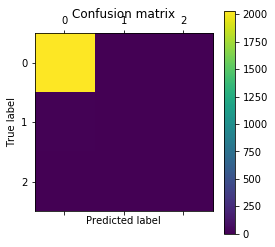

In [123]:
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()